In [67]:
# Imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler        # Import StandardScaler
import pickle           # Import pickle...
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA           # Using PCA to reduce the dimensionality...

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


In [68]:
# Set full view...
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# A. PART 1

#### **1. Data  Preparation:**
Download  the  dataset,  load  into a pandas  data  frame,  and prepare the datasetsfor analysis.

In [69]:
# Read the dataset...
df_cc_general = pd.read_csv("./data/CC GENERAL.csv")
df_cc_general.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Comment**<br>
The provided sample dataset provides an overview of the usage patterns of approximately 9,000 credit card customers. The data is organized at the customer level and includes 18 behavioral variables.

In [70]:
# Pick five (5) random dataset...
df_cc_general.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7736,C17945,1623.723148,1.000000,1283.16,0.00,1283.16,274.532868,1.000000,0.000000,1.000000,0.166667,2,36,1700.0,1047.305005,1431.799502,0.00,12
8448,C18677,105.182503,0.272727,787.09,754.47,32.62,0.000000,0.250000,0.250000,0.083333,0.000000,0,11,2500.0,840.571045,147.116092,0.00,12
1438,C11486,912.857498,1.000000,831.03,93.00,738.03,0.000000,0.571429,0.285714,0.714286,0.000000,0,8,5500.0,95.682798,195.497298,0.00,7
4713,C14842,1186.287841,1.000000,115.50,115.50,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,1200.0,446.088328,356.432463,0.00,12
3016,C13105,341.233281,1.000000,277.06,0.00,277.06,0.000000,0.583333,0.000000,0.500000,0.000000,0,7,2800.0,2859.947327,2595.876353,0.75,12


**Comment**<br>
Five (5) randomly selected samples representing diverse customer behaviors. 

In [71]:
# Study the tail of the data...
df_cc_general.tail(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


**Comment**<br>
Five (5) selected sample data reflecting the given dataset tail-view.

In [72]:
# Look into the columns...
df_cc_general.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

**Comment**<br>
The eighteen (18) variables that capture various aspects of customer behavior.

In [73]:
# Validate the number of rows and columns...
df_cc_general_rows, df_cc_general_columns = df_cc_general.shape
print("The number of rows : ", df_cc_general_rows)
print("The number of columns : ", df_cc_general_columns)

The number of rows :  8950
The number of columns :  18


**Comment**<br>
The dataset comprises around 9,000 entries and eighteen (18) distinct variables designed for analyzing their behaviors.

In [74]:
# Basic information about the dataset...
df_cc_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Comment**<br>
Running the .info() operation provides an overview indicating the existence of seventeen (17) variables with numeric data types [float64(14), int64(3)], and one variable, CUST_ID, is of object data type. Furthermore, this observation confirms the presence of missing values within the provided dataset. <br>
Variables with null values include: CREDIT_LIMIT and MINIMUM_PAYMENTS.

In [75]:
# Get summary statistics about the data...
df_cc_general.drop(columns=["TENURE"]).describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


**Comment**<br>

The .describe() provides an overview of the dataset's fundamental statistical characteristics. This analysis aids in grasping the inherent nature of the data.
<br>
The mean serves as a measure of the arithmetic average for each numeric variable. Similarly, the 50th percentile denotes the central value when the data is arranged, offering an understanding of the data's central tendency. Examining the quartiles, specifically the 25th and 75th percentiles, assists in comprehending the data's dispersion around the median. Lastly, the range (Max - Min) provides insight into the overall variability exhibited by the data.

#### **2 Exploratory Data Analysis (EDA):** <br>
Use numpy, pandas, and matplotlib to perform EDA on the data. This should include *identifying the presence of missing values (if any)*, *creating visualizations with the data*, and *identifying presence of outliers (if any)*.

In [76]:
# Identify the presence of null values...
df_cc_general.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [77]:
# Null values count - CREDIT_LIMIT
pd.isnull(df_cc_general["CREDIT_LIMIT"]).value_counts()

CREDIT_LIMIT
False    8949
True        1
Name: count, dtype: int64

In [78]:
# Null values count - MINIMUM_PAYMENTS
pd.isnull(df_cc_general["MINIMUM_PAYMENTS"]).value_counts()

MINIMUM_PAYMENTS
False    8637
True      313
Name: count, dtype: int64

**Comment**<br>
The isna().sum() and other needed checks confirms the presence of a single null value in the CREDIT_LIMIT column and the 313 in the MINIMUM_PAYMENTS column.

In [79]:
# Examine the overview of the null value (credit limit) record.
df_cc_general = df_cc_general.dropna(subset=["CREDIT_LIMIT"])

# Calculate the median value for the column...
min_payment_med = df_cc_general["MINIMUM_PAYMENTS"].median()
df_cc_general["MINIMUM_PAYMENTS"].fillna(min_payment_med, inplace=True)
df_cc_general.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Comment**<br>
For skewed data, where the mean and median are different, using the median (50th percentile) for imputing missing values is good as the median is less sensitive to extreme outliers than the mean and can be a better representation of central tendency in skewed distributions.

In [80]:
# Check for duplicates..
df_cc_general.duplicated().value_counts()

False    8949
Name: count, dtype: int64

**Comment**<br>
Based on analysis, there are no duplicated records in the given dataset...

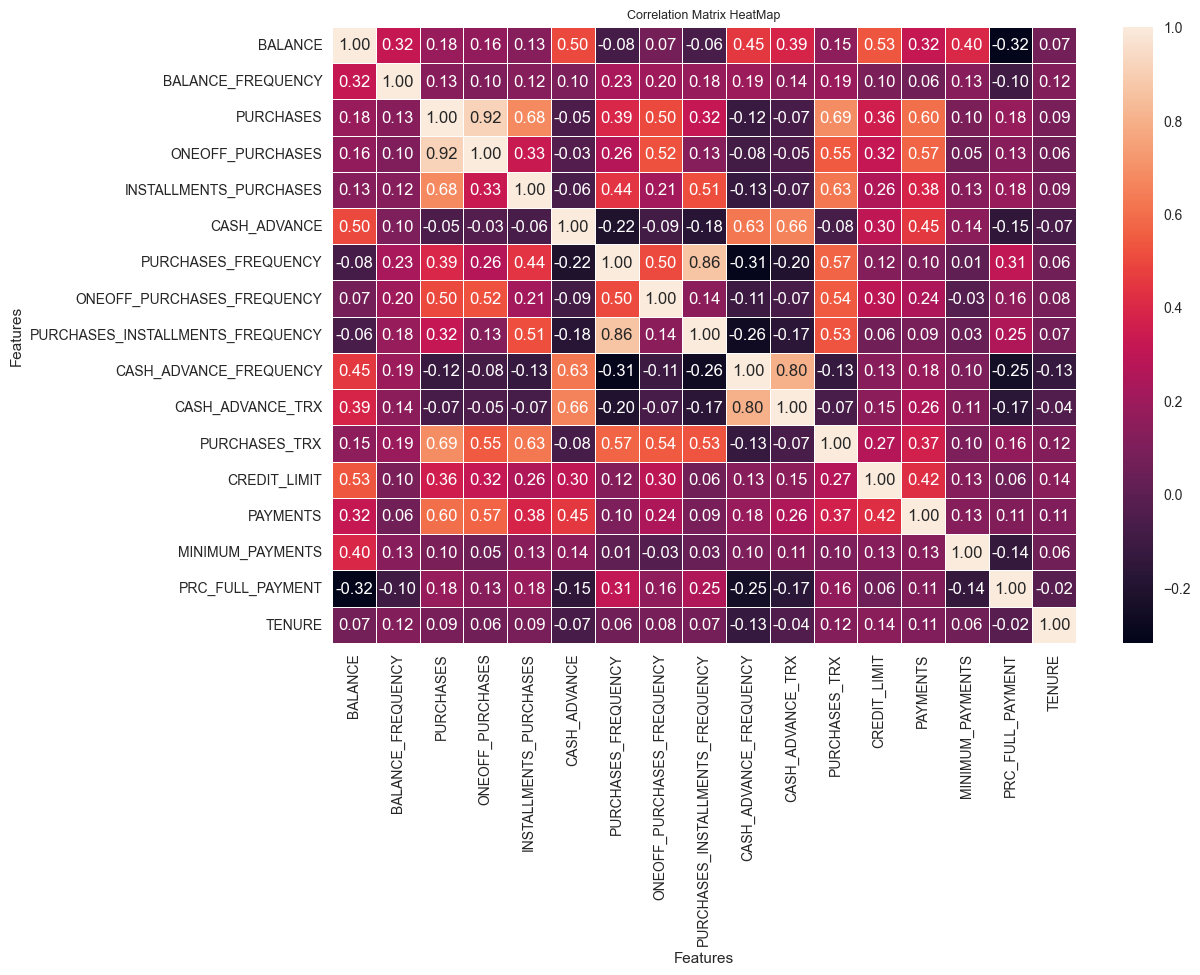

In [81]:
# Generate a heatmap to see the correlation of each component.
df_cc_general_corr = df_cc_general.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,8))
plt.title("Correlation Matrix HeatMap", fontsize=9)
sns.heatmap(df_cc_general_corr, annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

**Comment**<br>
The visualization above represent the correlation coefficients between variables. Each cell in the grid shows the correlation between two variables, indicated by the labels on the vertical and horizontal axes. The color intensity and the number in each cell represent the strength and direction of the correlation.

##### **Understand Relationship between variables: Create visualizations with the data**

**1.** <br>
**Purchase frequency and tenure** - Are longer-term customers making more frequent purchases?

In [82]:
df_tenure_purchases_freq = df_cc_general[["TENURE", "PURCHASES_FREQUENCY"]]
tenure_purchases_freq_grouped = df_tenure_purchases_freq.groupby("TENURE").mean()
tenure_purchases_freq_grouped.reset_index(inplace=True)
tenure_purchases_freq_grouped = tenure_purchases_freq_grouped.sort_values(by="PURCHASES_FREQUENCY", ascending=False)
tenure_purchases_freq_grouped

,TENURE,PURCHASES_FREQUENCY
6,12,0.506087
0,6,0.465517
1,7,0.430075
3,9,0.406349
2,8,0.405612
4,10,0.390254
5,11,0.360399


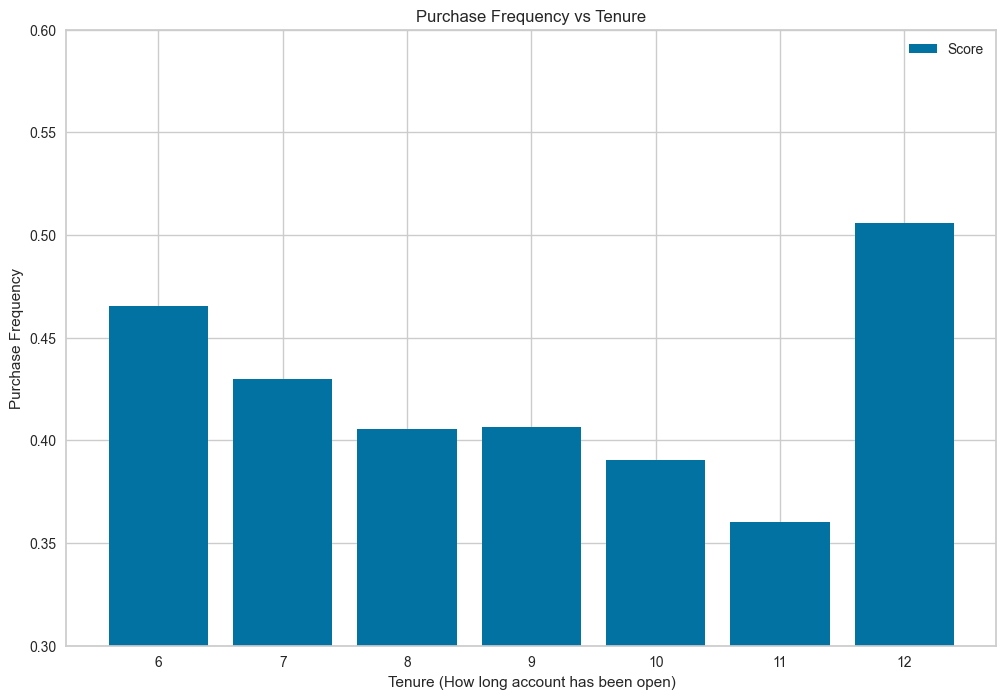

In [83]:
# Plot the relationship
plt.figure(figsize=(12,8))
plt.bar(tenure_purchases_freq_grouped["TENURE"], tenure_purchases_freq_grouped["PURCHASES_FREQUENCY"], label="Score")
plt.xlabel('Tenure (How long account has been open)') 
plt.ylabel('Purchase Frequency')
plt.ylim(0.3,0.6)
plt.legend()
plt.title('Purchase Frequency vs Tenure')
plt.show()

**Comment**<br>
From the chart, customers with a tenure of 6 month show a relatively high purchase frequency, which then decreases for tenures of 7 and 8 months. There is a slight increase for a tenure of 9 years followed by a decrease at 10 months, and a significant drop at 11 months. However, there is a noticeable increase in purchase frequency for customers with a tenure of 12 months, which is the highest point on the chart. Based on analysis, it is not a straightforward trend that longer-term customers make more frequent purchases.The relationship appears to be more complex with potentially other contributing factors.

**2.** <br> 
**Credit limit and purchases/cash advances taken** - Are people with higher limits purchasing more goods or taking more cash?

In [84]:
df_credit_limit = df_cc_general.groupby("CREDIT_LIMIT")[['PURCHASES']].mean()
df_credit_limit.reset_index(inplace=True)
df_credit_limit["data_binned"] = pd.cut(df_credit_limit["CREDIT_LIMIT"], bins=5)
df_credit_limit.head(5)

,CREDIT_LIMIT,PURCHASES,data_binned
0,50.0,0.000000,"(20.05, 6040.0]"
1,150.0,45.800000,"(20.05, 6040.0]"
2,200.0,81.813333,"(20.05, 6040.0]"
3,300.0,405.390000,"(20.05, 6040.0]"
4,400.0,644.826667,"(20.05, 6040.0]"


In [85]:
binned_data = df_credit_limit.groupby("data_binned")[["PURCHASES"]].mean()
binned_data.reset_index(inplace=True)
binned_data

C:\Users\Damilare\AppData\Local\Temp\ipykernel_63060\260679245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df_credit_limit.groupby("data_binned")[["PURCHASES"]].mean()


,data_binned,PURCHASES
0,"(20.05, 6040.0]",914.038000
1,"(6040.0, 12030.0]",2156.718644
2,"(12030.0, 18020.0]",4046.342792
3,"(18020.0, 24010.0]",8576.159879
4,"(24010.0, 30000.0]",14577.008333


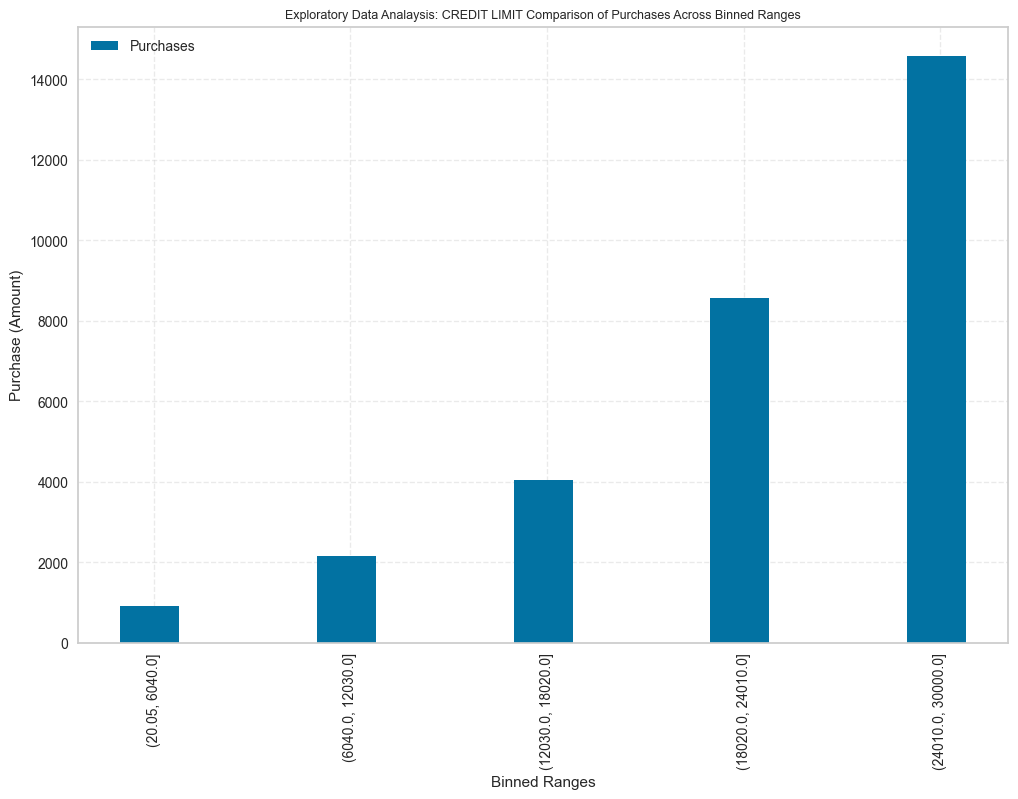

In [86]:
# Plotting
plt.figure(figsize=(12, 8))

# Bar width
bar_width = 0.30

# X-axis positions for each group
index = range(len(binned_data))

# Bars for PURCHASES
plt.bar(index, binned_data['PURCHASES'], bar_width, label='Purchases')

# Labelling axes and title
plt.xlabel('Binned Ranges')
plt.ylabel('Purchase (Amount)')
plt.title('Exploratory Data Analaysis: CREDIT LIMIT Comparison of Purchases Across Binned Ranges', fontsize=9)
plt.xticks([i + bar_width / 15 for i in index], binned_data['data_binned'], rotation=90)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.show()

**Comment**<br>
As the business management make provision for increase in credit card limit for the customers, it was noticed that there was an increase in their purchasing behaviour. 

**3**<br> **Features Distribution -**
What distribution characterizes each feature?

In [87]:
# Understand the distribution of the dataset...
int_columns = df_cc_general.columns[1:]
int_columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

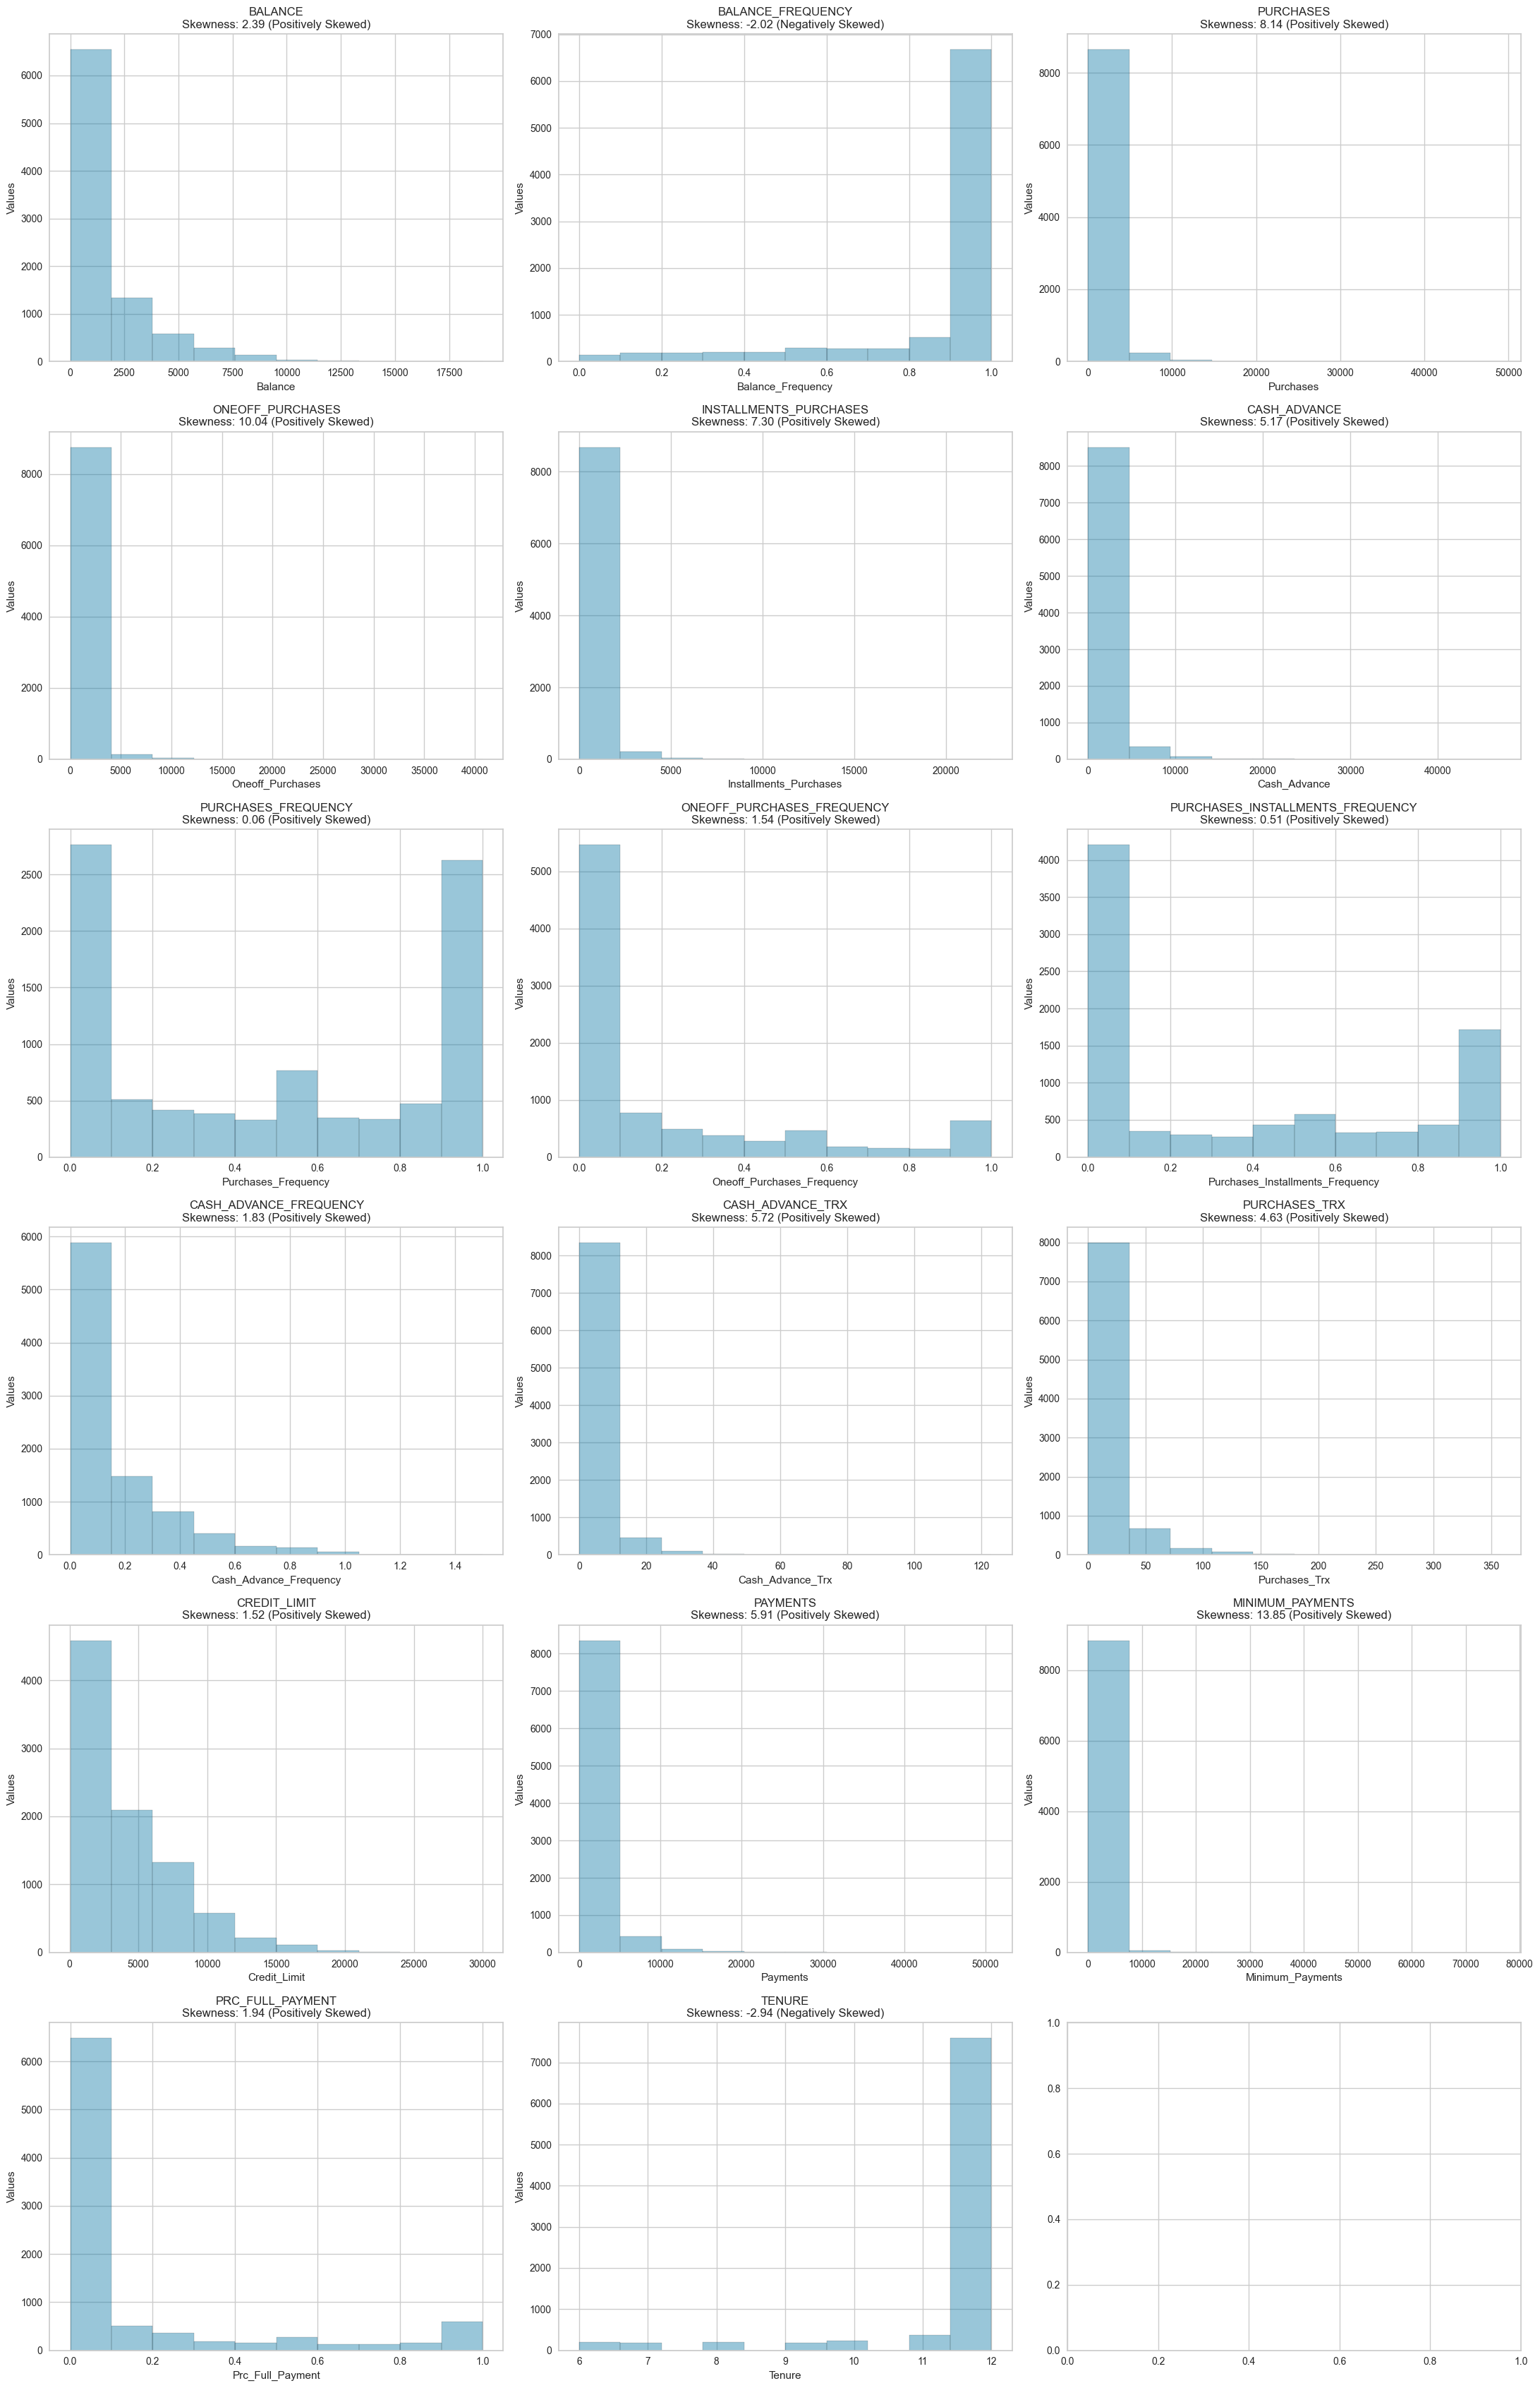

In [88]:
record_collection = {}

# Calculate the number of rows and columns for the subplots...
n_rows = (len(int_columns) + 2) // 3    # 3 subplots per row, rounded up.
n_cols = min(len(int_columns), 3)       # Maximum of 3 subplots in a row

# Create subplots with 4 rows and 3 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22,34))
# fig.subplots_adjust(hspace=0.5)

axes = axes.ravel()         # Flatten the 2D array of suplots...

for i, column in enumerate(int_columns):
    
    # Calculate skewness using SciPy's skew function
    skewness = stats.skew(df_cc_general[column])

    # Interpret skewness value
    if skewness > 0:
        skewness_type = "Positively Skewed"
    elif skewness < 0:
        skewness_type = "Negatively Skewed"
    else:
        skewness_type = "Approximately Symmetric"

    axes[i].hist(df_cc_general[column], bins=10, edgecolor='k', alpha=0.4)
    axes[i].set_title(f'{column}\nSkewness: {skewness:.2f} ({skewness_type})')
    axes[i].set_xlabel(column.title())
    axes[i].set_ylabel("Values")

    record_collection[column] = [skewness, skewness_type]

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [89]:
data_list = []

# Convert the data dictionary into a list of list...
for key, value in record_collection.items():
    data_list.append([key, value[0], value[1]])

# render the dictionary using tabulate...
table = tabulate(data_list, headers=["Features", "Value", "Comment"], tablefmt="grid", colalign=["left","center", "left"])

# Display the formatted table...
print(table)

+----------------------------------+-----------+-------------------+
| Features                         |   Value   | Comment           |
+==================================+===========+===================+
| BALANCE                          |  2.39287  | Positively Skewed |
+----------------------------------+-----------+-------------------+
| BALANCE_FREQUENCY                | -2.02385  | Negatively Skewed |
+----------------------------------+-----------+-------------------+
| PURCHASES                        |  8.1426   | Positively Skewed |
+----------------------------------+-----------+-------------------+
| ONEOFF_PURCHASES                 |  10.0429  | Positively Skewed |
+----------------------------------+-----------+-------------------+
| INSTALLMENTS_PURCHASES           |  7.2976   | Positively Skewed |
+----------------------------------+-----------+-------------------+
| CASH_ADVANCE                     |  5.16546  | Positively Skewed |
+---------------------------------

**Comment**<br>
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable. It reflects the direction and relative strength of a distribution's tail. From the given dataset, there are (15) positively skewed variables and (2) negatively skewed variables.

**Positive Skewness (Right-Skewed):**
- This indicates that the majority of data points are gathered near the smaller end of the scale, while a handful of significantly higher values are shifting the average to a point beyond the median.
- The right-hand side of the distribution shows a more extended or bulkier tail compared to the left, with the bulk of the distribution's density leaning towards the left side.
- Typically, statistical averages such as the mean are higher in value than the median in such distributions. <br>

**Negative Skewness (Left-Skewed):**
- This indicates that most data points are situated near the higher end of the range, while a small number of notably lower values are causing the average to be positioned to the left of the median. In this case, the mean is lower than the median.
- The distribution's density is predominantly situated on the right side.

**Important Note**<br>
Skewness can substantially impact statistical analyses, particularly those dependent on a normal distribution. To address this, logarithmic transformations was supposed to be used for positive skewness, while squared transformations for negative skewness. However, as an alternative, z-score standardization was applied to reduce the sensitivity of the RandomForest Classifier to skewness.

#### **3 Preprocessing**

**a** <br>
Do outliers exist in the provided dataset, if yes, show evidence.

In [90]:
# Numeric features for outlier detection
numeric_features = df_cc_general.iloc[:, 1:-1]  # "CUST_ID" and "TENURE" excluded

# Calculate the mean and covariance matrix of the data
mean = np.mean(numeric_features, axis=0)
covariance_matrix = np.cov(numeric_features, rowvar=False)

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(covariance_matrix)

# Calculate Mahalanobis Distance for each data point
mahalanobis_distances = []

for index, row in numeric_features.iterrows():
    mahalanobis_distance = distance.mahalanobis(row, mean, inv_cov_matrix)
    mahalanobis_distances.append(mahalanobis_distance)

# Define a threshold for identifying multivariate outliers (e.g., based on percentile)
percentile_threshold = np.percentile(mahalanobis_distances, 95)  # 95th percentile

# Identify outliers based on the threshold
outliers = np.where(np.array(mahalanobis_distances) > percentile_threshold)[0]

# Print the indices and values of identified outliers
print(f"Number of Multivariate Outliers: {len(outliers)}")

Number of Multivariate Outliers: 448


In [91]:
# Dimension of outliers...
print("Information of Multivariate Outliers:")
print(df_cc_general.iloc[outliers].shape)

Information of Multivariate Outliers:
(448, 18)


In [92]:
# Records considered outliers...
df_cc_general.iloc[outliers].head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
30,C10031,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.000000,12
34,C10035,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12
39,C10040,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6,6,7500.0,20071.075440,719.948985,0.333333,12
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12


**Comment**<br>

The detection of approximately 448 outliers in the dataset signifies a noteworthy deviation from the expected range of values.These outliers represent anomalies due to various factors such as extreme variations in customers behaviour. The presence of the number of outliers justify the fact that the dataset is to a heavy-tailed distributions.

**Feedback:** Missing values already handled.

Are there duplicated values ?

In [93]:
df_cc_general.iloc[:,0].duplicated().value_counts()

CUST_ID
False    8949
Name: count, dtype: int64

**Comment**<br>
Based on analysis, there are no duplicated record in the given dataset.

#### 3b<br>
Perform appropriate label encoding for categorical attributes (if needed) and data scaling using the standard scaler (if needed). *Save the standard scaler if used so that it can be retrieved during model deployment. (Hint: You can serialize an object using pickle)*

In [94]:
# Check for categorical columns based on data types..
categorical_columns = df_cc_general.select_dtypes(include=['object', 'category'])

# Print the names of categorical columns...
print(categorical_columns.columns)

Index(['CUST_ID'], dtype='object')


In [95]:
df_cc_general["CUST_ID"].unique()

array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)

**Comment**<br>
Based on analysis, there are no categorical data in the given data set hence, the application of one-hot or label encoding is unnecessary. 

##### 3b (ii)<br>
If needed, perform data scaling using the standard scaler. Save the standard scaler if used so that it can be retrieved during model deployment. (Hint: You can serialize an object using pickle).

*Justification for Standardizing Data*<br>
Algorithms that rely on distance calculations, such as k-means clustering are sensitive to the scale of features. Scaling ensures that the algorithms perform optimally.

In [96]:
# Standard Scaler...
scaler = StandardScaler()
scaled_cc_general = scaler.fit_transform(df_cc_general.drop(columns=["CUST_ID", "TENURE"], axis=1))
scaled_df_cc_general=pd.DataFrame(scaled_cc_general, 
        columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',\
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',\
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

# Serialize (save) to a file
with open("./saved_models/st_scaled_data.pkl", 'wb') as file:
    pickle.dump(scaled_cc_general, file)

In [97]:
# Standard Scaled Data Frame...
scaled_df_cc_general.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588


### Question 4 <br>
**Unsupervised model creation and evaluation:** <br>
a) [16Pts] Use scikit-learn to build and evaluate a clustering model. Provide justification for the evaluation metric(s).<br>
b) [4Pts] Based on the clusters in a) above, label the entire dataset and save the labelled dataset as yourandrewid-cc-labeled.csv.

In [98]:
# Defined utility function...
def plotElbow(data,metric):
    model=KMeans()
    #Metrics include:
    #distortion: mean sum of squared distances to centers                   #silhouette: mean ratio of intra-cluster and nearest-cluster distance
    #calinski_harabasz: ratio of within to between cluster dispersion
    visualizer=KElbowVisualizer(model, k=(2,15), metric=metric, timings=False) #timing=False ensures training time is not displayed.
    visualizer.fit(data)
    visualizer.show()

C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

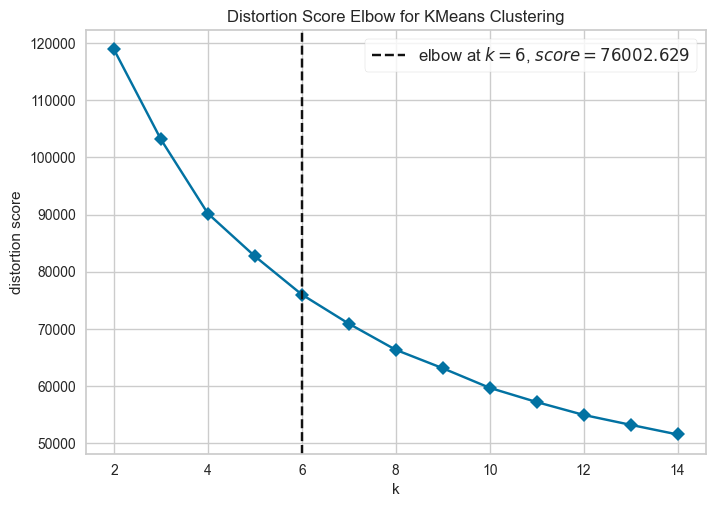

In [99]:
#metric='silhouette'
#metric='calinski_harabasz'
metric='distortion'
plotElbow(scaled_df_cc_general,metric)

C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

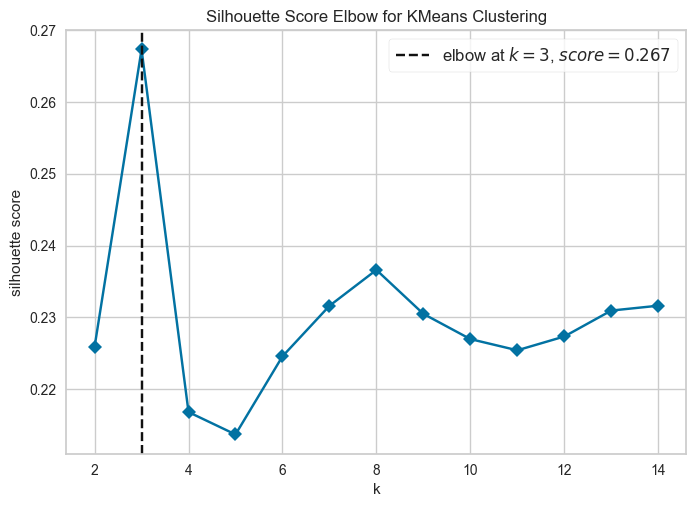

In [100]:
metric='silhouette'
#metric='calinski_harabasz'
#metric='distortion'
plotElbow(scaled_df_cc_general,metric)

C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

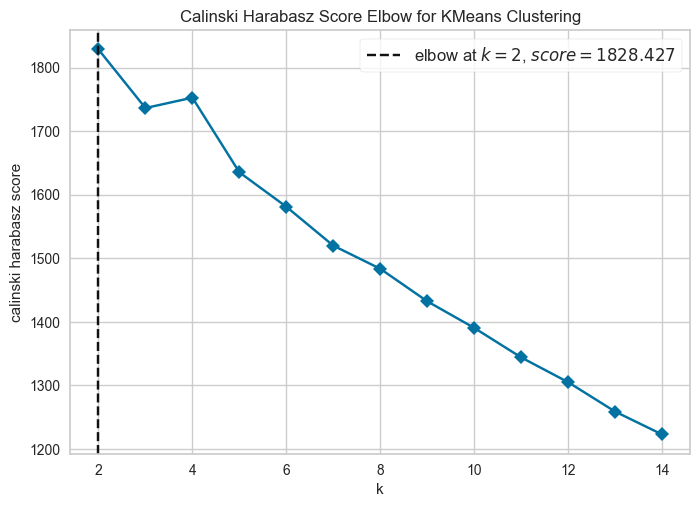

In [101]:
#metric='silhouette'
metric='calinski_harabasz'
#metric='distortion'
plotElbow(scaled_df_cc_general,metric)

**Comment**<br>
Based on comprehensive research and analysis, it becomes evident that the silhouette score is a robust, intuitive, and versatile metric for evaluating clustering solutions. <br>
Based on the given task, the primary reasons for its preference lies in its ability to assess cluster quality without making any assumptions about the underlying data distribution or relying on ground truth labels. Unlike some other metrics, the silhouette score does not impose constraints on the shape of clusters, making it highly adaptable to different data scenarios.  Overall, the silhouette score's flexibility, independence from prior knowledge about cluster count, and interpretability make it a preferred choice for evaluating clustering results in diverse data analysis tasks.


In [102]:
# Evaluation from silhouette score... (optimal k = 3)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(scaled_df_cc_general)
scaled_df_cc_general["clusters"] = cluster_labels # and assign cluster labels

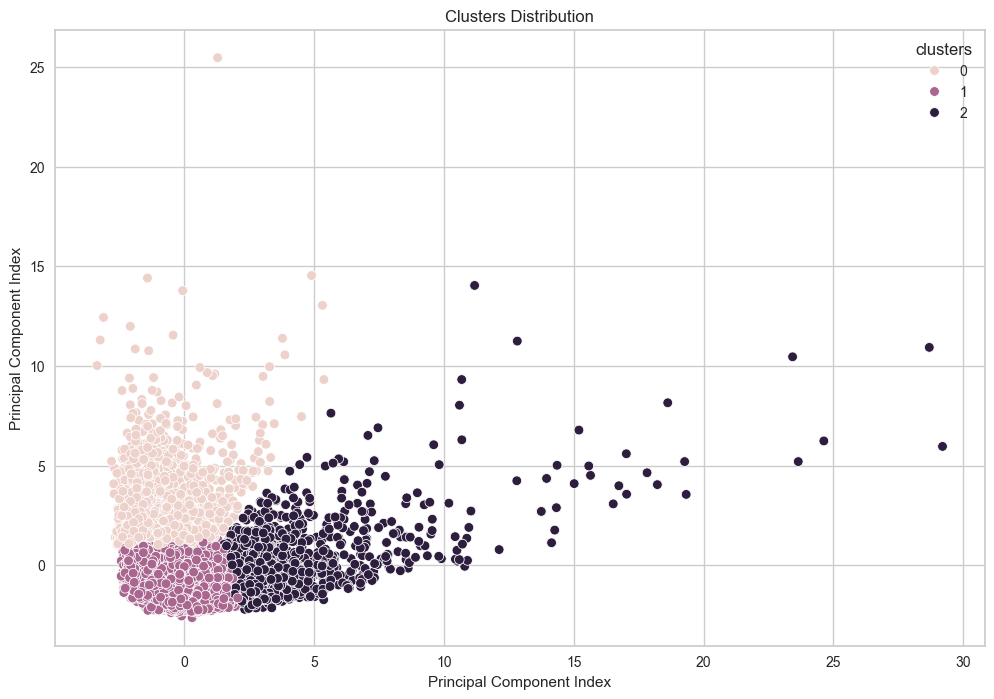

In [103]:
# using PCA to reduce the dimensionality---for purposes of 2D visualization
pca = PCA(n_components=2, whiten=False, random_state=42)
pca_df_cc_general = pca.fit_transform(scaled_df_cc_general)
pca_df_cc_general = pd.DataFrame(data=pca_df_cc_general, columns=["pc_1", "pc_2"])
pca_df_cc_general["clusters"] = cluster_labels

# plotting the clusters with seaborn
plt.figure(figsize=(12,8))
plt.title("Clusters Distribution")
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=pca_df_cc_general)
plt.xlabel("Principal Component Index")
plt.ylabel("Principal Component Index")
plt.show()

In [104]:
# Calculate silhouette_score
print("Silhouette score: {:.4f}".format(silhouette_score(pca_df_cc_general, kmeans.labels_)))

Silhouette score: 0.5002


**Comment**<br>
The average Silhouette score is 0.5002

In [105]:
# Specify the filepath...
filepath = "./data/dolatunj-cc-labeled.csv"

# Convert to CSV...
scaled_df_cc_general.to_csv(filepath, "w", index=False)

#### 5) Supervised model creation and evaluation:<br> 
a) Use scikit-learn to  build  and  evaluate  a  classification  model based  on  cross validation. <br>
- Provide justification for the evaluation metric(s). Save the model so that it can be retrieved if necessary. <br>

In [106]:
scaled_df_cc_general.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,clusters
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,1
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,1
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,1
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,1


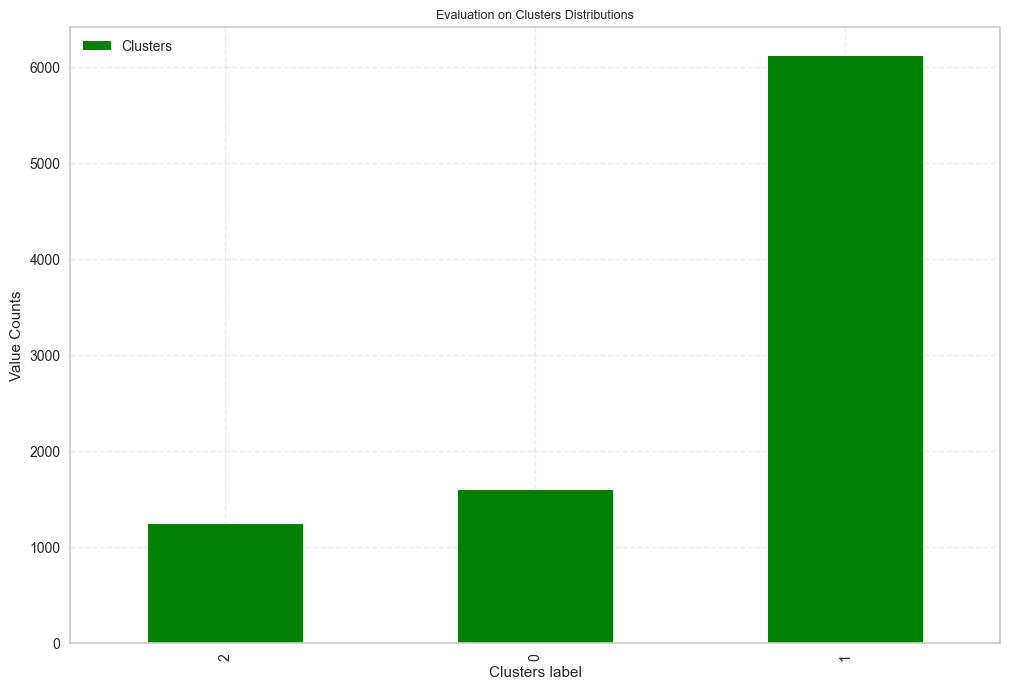

In [107]:
cluster_count = scaled_df_cc_general["clusters"].value_counts().sort_values()
cluster_count.plot(kind="bar", figsize=(12,8), label="Clusters", color="green")
plt.title("Evaluation on Clusters Distributions", fontsize=9)
plt.xlabel("Clusters label")
plt.ylabel("Value Counts")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

In [108]:
# Needed libraries...
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, f1_score, precision_score, roc_auc_score, recall_score
from sklearn.model_selection import learning_curve

In [109]:
# Define the model to be used...
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Extract the dependent and independent variables...
X = scaled_df_cc_general.drop(columns=["clusters"], axis=1)
y = scaled_df_cc_general["clusters"]

# Cross-validation with the specified metrics
y_pred = cross_val_predict(rf_classifier, X, y, cv=5)       # Predicted lables..

# Scoring metrics..
f1_weighted = f1_score(y, y_pred, average='weighted')
precision_weighted = precision_score(y, y_pred, average="weighted")
recall_weighted = recall_score(y, y_pred, average="weighted")

scoring_records = {}
scoring_records["F1-score (weighted)"] = round(f1_weighted,3)
scoring_records["Precision (weighted)"] = round(precision_weighted,3)
scoring_records["Recall (weighted)"] = round(recall_weighted,3)

# Print the results
print("Cross-Validation Scores:")
print(f"F1-score (Weighted): {f1_weighted:.3}")
print(f"Precision (Weighted): {precision_weighted:.3f}")
print(f"Recall (Weighted): {recall_weighted:.3f}")



Cross-Validation Scores:
F1-score (Weighted): 0.963
Precision (Weighted): 0.963
Recall (Weighted): 0.963


In [110]:
# Extract the dependent and independent variables...
X = scaled_df_cc_general.drop(columns=["clusters"], axis=1)
y = scaled_df_cc_general["clusters"]

# Define the model to be used...
rmf_classifier = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rmf_classifier = rmf_classifier.fit(X,y)

# Save the model 
rf_classifier_model = "./saved_models/rf_classifier_model.pkl"
with open(rf_classifier_model, "wb") as file:
    pickle.dump(rmf_classifier, file)

In [111]:
df_score = pd.Series(data=scoring_records, index=scoring_records.keys())

(0.9, 1.0)

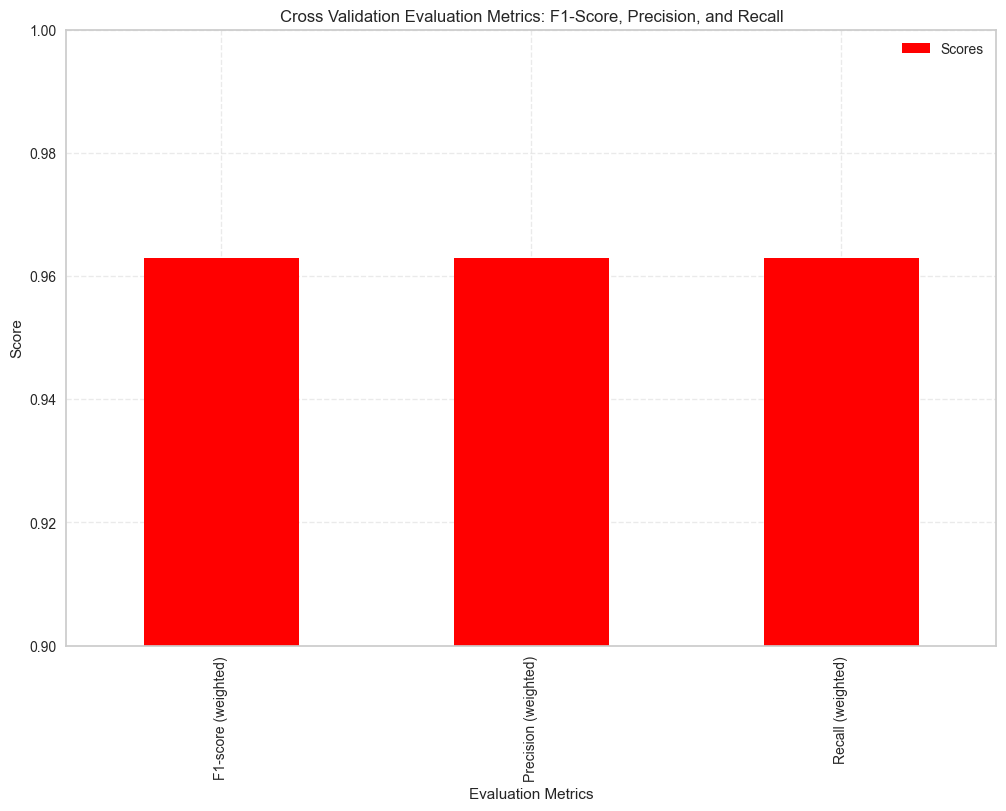

In [112]:
plt.title("Cross Validation Evaluation Metrics: F1-Score, Precision, and Recall")
df_score.plot(kind="bar", figsize=(12,8), color="red", label="Scores")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.ylim((0.90,1))

**Justification for the evaluation metric**<br>

The selection of F1-Score, Recall, and Precision as evaluation metrics was a deliberate choice stemming from the recognition of a significant imbalance in the size of the generated clusters. By opting for these metrics, it gives a more comprehensive evaluation that takes into account not only the overall accuracy but also the ability of the algorithm to correctly identify and distinguish data points within smaller clusters. F1-Score, in particular, strikes a balance between precision and recall, making it well-suited for scenarios where class imbalance exists. Precision emphasizes the accuracy of positive predictions, while recall focuses on the ability to capture all positive instances. This combination provides a more nuanced understanding of how the algorithm performs across clusters of varying sizes, ensuring a thorough assessment that considers the challenges posed by imbalanced data distribution.

**b)** [7Pts] <br>
Use  learning  curves  to  determine  whether  the  model  is  overfitting  or underfitting the data. <br>
Add mark down cells to comment on the results. <br>

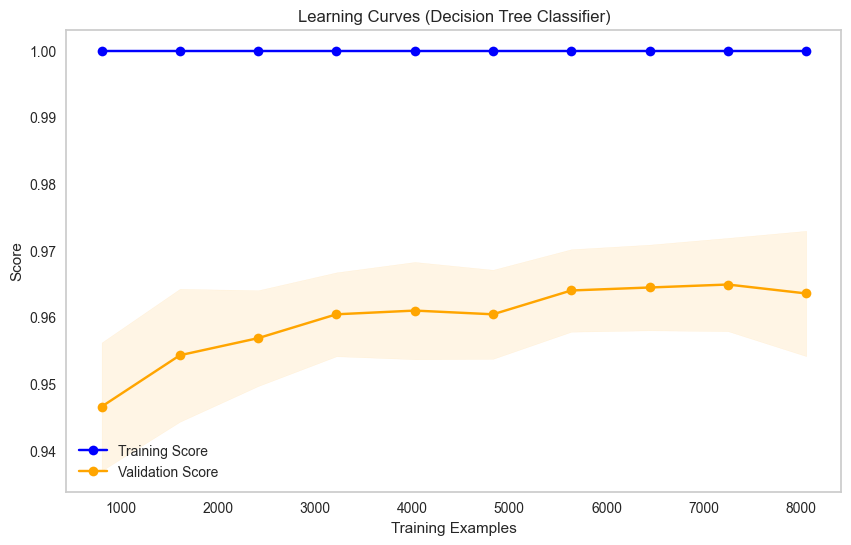

In [113]:
# Define the fractions of training sizes (e.g., 10%, 20%, ..., 100%)
train_sizes = np.linspace(0.1, 1.0, 10)

# Learning curves...
train_sizes, train_scores, valid_scores = learning_curve(estimator=rf_classifier, X=X, y=y, train_sizes=train_sizes, cv=10, n_jobs=1)

# Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Decision Tree Classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

# Plot the training and validation scores with shaded regions indicating variance
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="orange", label="Validation Score")

# Add legend
plt.legend(loc="best")

# Show the plot
plt.show()

**Comment**<br>
Learning curves are commonly used to gain insights into a model's behaviour and to diagnose whether a model is suffering from overfitting or underfitting. Based on analysis, both the training and validation scores increases and stabilize at a high value as more data is used for training. This indicates that the model is learning well from the data and generalizing effectively. <br><br>
**Did I notice overfitting or underfitting ?** <br>
<br>
Overfitting is typically identified when the training score greatly surpasses the validation score, resulting in a substantial gap between them. However, upon examining the learning curves, the observed difference between the training score and test score is roughly 0.04, which is not indicative of significant overfitting. Similarly, underfitting is characterized by both low training and validation scores that are closely aligned. Yet, the generated visual representations do not exhibit clear signs of underfitting.

**c)** <br>
Provide a justification for the classification algorithm used in a) above. <br>

The selection of the Random Forest Classifier for the classification task was based on its proficiency as an ensemble technique capable of addressing multiclass challenges and imbalanced data scenarios. Notably, it possesses the ability to assign greater significance to minority class instances throughout the training phase,making it robust to class imbalance. 

### 6) Feature Selection and Engineering:
<br>This should reduce your data dimensions to determine if  building  models  with  reduced  dimensions  improves  performance. <br>

**Using  pandas  and scikit-learn:** <br>
a)[15pts] Perform  feature  selection  on  the  dataset  to  determine  new  features  or  a feature  subset  to  be  used  in  model  building.Provide  justification  for  the  feature selection approach used.<br>
3b)[7Pts] Using scikit-learn and cross validationbuild and evaluate a new classification model based on the features identified in 6a) above. Save the model so that it can be retrieved if necessary. <br>
c)[3 Pts]Compare the results with those in 5a) above. What did you observe?

Indices of the top 6 features: ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']


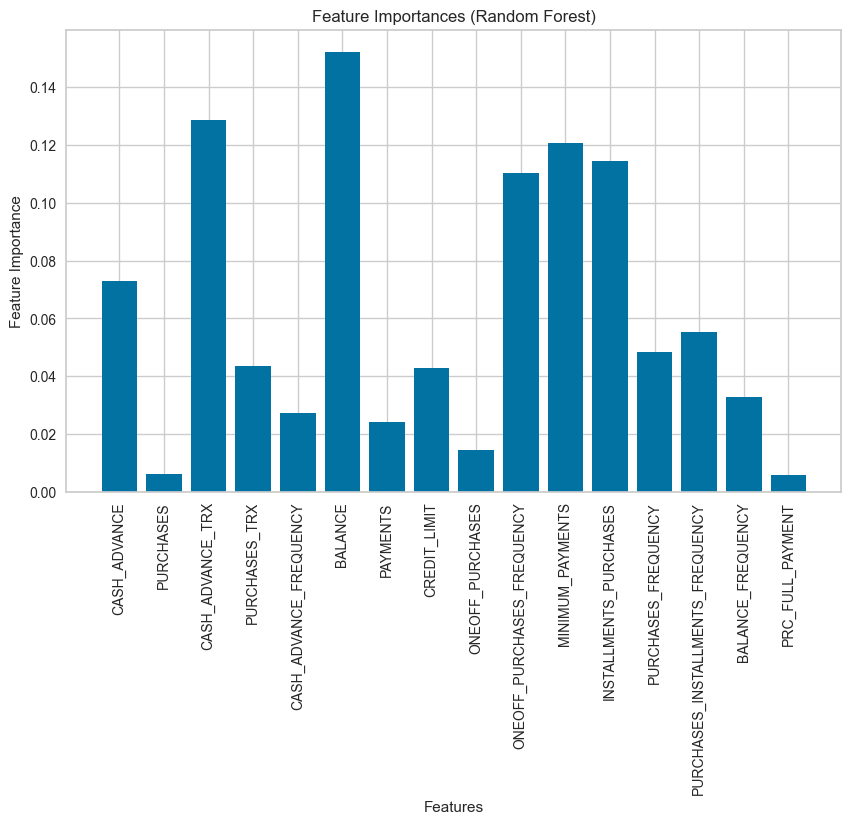

In [114]:
from sklearn.feature_selection import SelectFromModel

# Create a Random Forest Classifier...
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data...
rf_classifier.fit(X,y)

# Get feature importances from the trained model.
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order and get corresponding indices...
indices = np.argsort(feature_importances)[::-1]

# Set the number of top features to select (k)
# k = 10

# Select the top-k features based on importance scores
sfm = SelectFromModel(rf_classifier, threshold="mean")
sfm.fit(X, y)
selected_features = sfm.transform(X)

# List of indices...
important_indices = np.where(sfm.get_support())[0]
columns_name = X.columns

# Retrieve element names by indices
important_element_indices = [columns_name[i] for i in important_indices]

# Retrieve element names by indices
element_indices = [columns_name[i] for i in indices]

# Print the indices of the top-k features
# print("Indices of the top", k, "features:", np.where(sfm.get_support())[0])

# Print the indices of the top-k features
print("Indices of the top", len(important_element_indices), "features:", important_element_indices)

# Optionally, you can plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(element_indices, feature_importances, align="center")
# Set the rotation angle for x-axis labels (vertical orientation)
plt.xticks(rotation=90)

plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.show()


**Justification for using Feature Importance from Random Forest Classifier**<br>

Feature importance from a Random Forest classifier was used because its a robust and widely adopted method for identifying important features in a dataset. As it leverages the strength of ensemble learning, providing stable and reliable feature importance scores it is worthy of use. <br>
By focusing attention on the most influential features, it assists in identifying and removing redundant features, guiding feature engineering efforts, and even diagnosing model performance issues.

In [115]:
X_reduced = X[important_element_indices]

# Cross-validation with the specified metrics
y_pred = cross_val_predict(rf_classifier, X_reduced, y, cv=5)       # Predicted lables..

# Scoring metrics..
f1_macro = f1_score(y, y_pred, average='weighted')
precision_macro = precision_score(y, y_pred, average="weighted")
recall_macro = recall_score(y, y_pred, average="weighted")

scoring_records = {}
scoring_records["F1-score (weighted)"] = round(f1_weighted,3)
scoring_records["Precision (weighted)"] = round(precision_weighted,3)
scoring_records["Recall (weighted)"] = round(recall_weighted,3)

# Print the results
print("Cross-Validation Scores:")
print(f"F1-score (weighted): {f1_weighted:.3f}")
print(f"Precision (weighted): {precision_weighted:.3f}")
print(f"Recall (weighted): {recall_weighted:.3f}")



df_score_II = pd.Series(data=scoring_records, index=scoring_records.keys())


Cross-Validation Scores:
F1-score (weighted): 0.963
Precision (weighted): 0.963
Recall (weighted): 0.963


In [116]:
# Define the model to be used...
x_reduced_rmf_classifier = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
x_reduced_rmf_classifier = x_reduced_rmf_classifier.fit(X_reduced,y)

# Save the model 
x_reduced_rf_classifier_model = "./saved_models/x_reduced_rf_classifier_model.pkl"
with open(x_reduced_rf_classifier_model, "wb") as file:
    pickle.dump(x_reduced_rmf_classifier, file)

(0.9, 1.0)

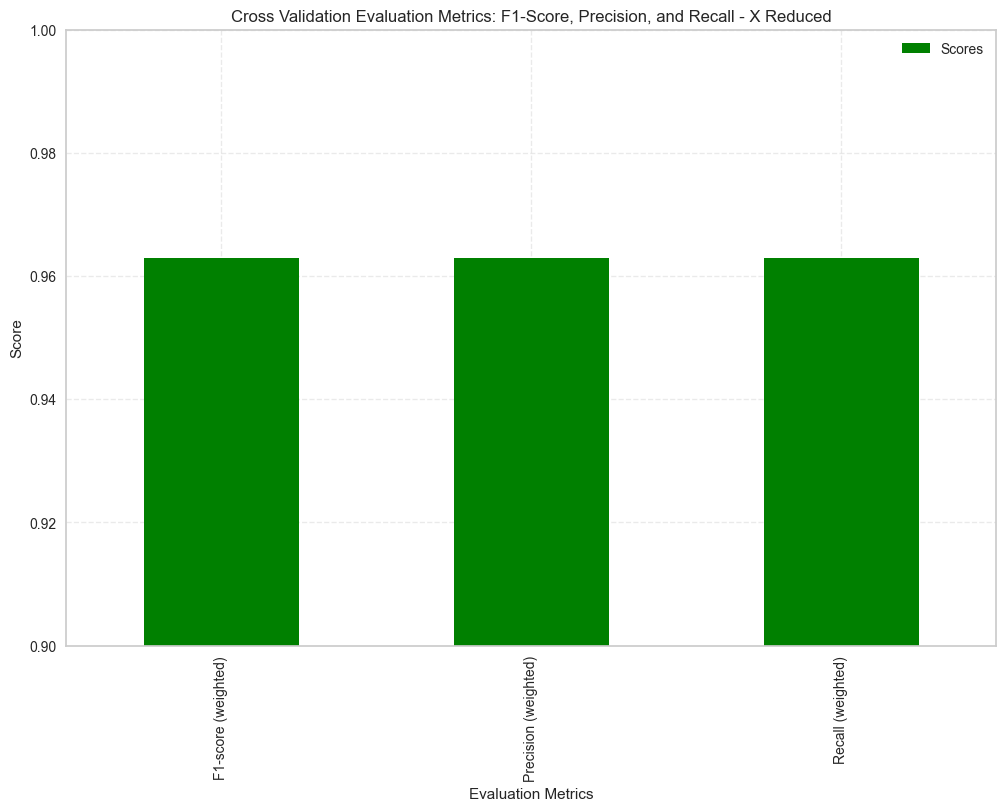

In [117]:
plt.title("Cross Validation Evaluation Metrics: F1-Score, Precision, and Recall - X Reduced")
df_score.plot(kind="bar", figsize=(12,8), color="green", label="Scores")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.ylim((0.90,1))

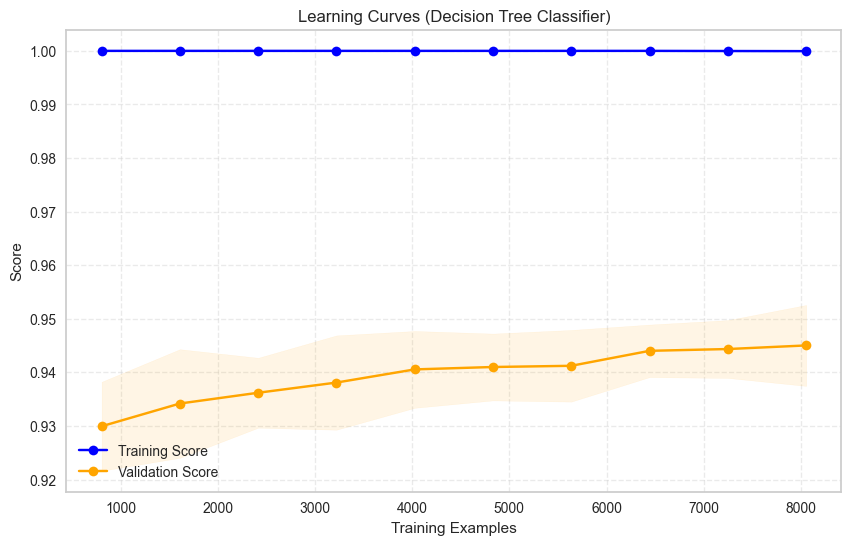

In [118]:
# Define the fractions of training sizes (e.g., 10%, 20%, ..., 100%)
train_sizes = np.linspace(0.1, 1.0, 10)

# Learning curves...
train_sizes, train_scores, valid_scores = learning_curve(estimator=rf_classifier, X=X_reduced, y=y, train_sizes=train_sizes, cv=10, n_jobs=1)

# Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Decision Tree Classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid(True, linestyle="--", alpha=0.4)

# Plot the training and validation scores with shaded regions indicating variance
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="orange", label="Validation Score")

# Add legend
plt.legend(loc="best")

# Show the plot
plt.show()

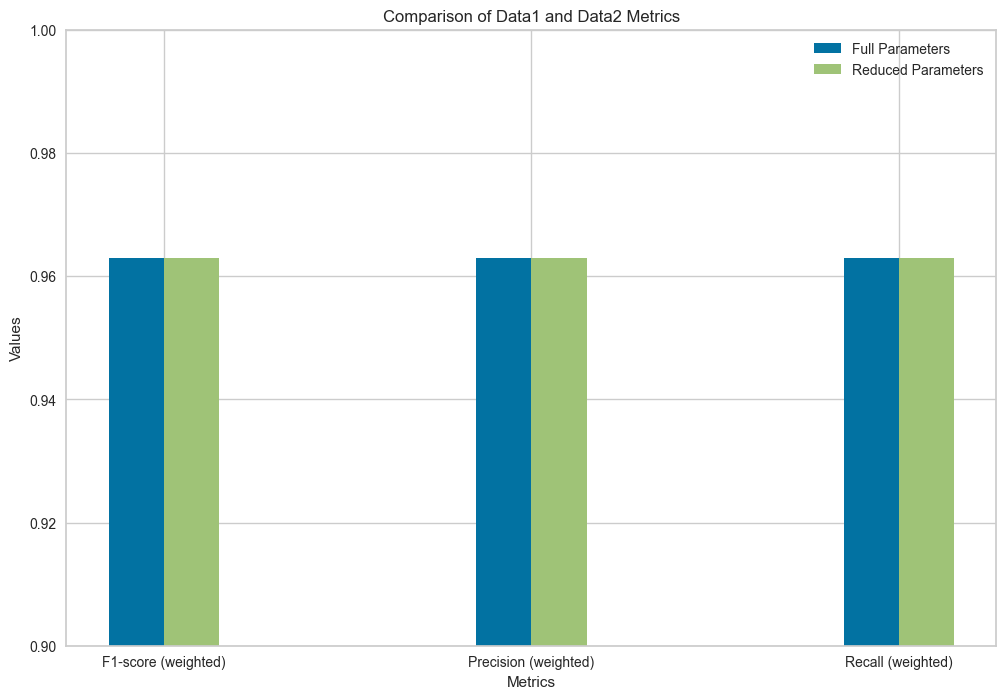

In [119]:
full_parameter_data =  df_score.values
reduced_parameter_data = df_score_II.values

# Define the labels for the metrics
labels = ['F1-score (weighted)', 'Precision (weighted)', 'Recall (weighted)']

# Create a bar plot with two bars side by side
x = range(len(labels))
width = 0.15  # Width of each bar

plt.figure(figsize=(12,8))
plt.bar(x, full_parameter_data, width, label='Full Parameters')
plt.bar([i + width for i in x], reduced_parameter_data, width, label='Reduced Parameters')

# Add labels and title (optional)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0.90,1)
plt.title('Comparison of Data1 and Data2 Metrics')
plt.xticks([i + width/2 for i in x], labels)  # Set x-axis labels

# Add a legend
plt.legend()

# Show the plot
plt.show()

c) **Compare the results with those in 5a) above. What did you observe ?**

The chart above compares the performance of "Full Parameters" and "Reduced Parameters"—across three weighted metrics: F1-score, Precision, and Recall. The performance of both configurations is notably high and equal across all metrics. This suggests that with a reduced dimension, the same level of scoring can be achieved. 

#### 7. 
**Hyper parameter tuning: This should make it possible to identify optimal hyperparameters for building a machine learning model.** <br>
Using pandas and scikit-learn: <br>
a) Select  the  best model  (either the  one with  or without feature  selection)  as your benchmark  model. The benchmark  model should  be  the  model  with  the  best performance  overall  (this  should  be  clear by  comparing  the  models  in 5a)and 6b) based  on  the  performance  metrics). You  may  use  visualizations  to  highlight  the comparison. cc(you  can  only  use all  featuresor selected  featuresdepending on the one that resulted in the benchmark model). Your search space for hyperparameters must include at least twohyperparameters.Save the tuned model so that it can be retrieved if necessary. <br>
b)[5Pts]Provide a justification for the selected hyperparameters. <br>


In [120]:
from sklearn.model_selection import GridSearchCV

# Initialize the random forest classifier...
rf_classifier = RandomForestClassifier(random_state=42)

# Define the search space (param_grid)...
search_space={
            'n_estimators':[10,40,70,90,120],
            'max_depth':[2,3,5,10,20],
            'criterion':['gini','entropy'],
            'max_depth':[5,10,20],
            'bootstrap':[True,False],
            
             }

k=5          #The number of splits (k)      5-fold cross validation

# scoring metrics as a dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted'
}


#Create a GridSearch object
gd_search=GridSearchCV(estimator=rf_classifier, param_grid=search_space,\
                        cv=k, n_jobs=1,verbose=2,scoring=scoring, refit=False)

gd_search = gd_search.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=40; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, n_estimators=40; total time=   0.5s
[CV] END bootstrap=True, criterion=gin

In [121]:
# To evaluate the results...
cv_results = gd_search.cv_results_
#Transform cv_results ( a dictionary) into a  Pandas data frame.
accuracy_df = pd.DataFrame(cv_results)
accuracy_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision_weighted,split1_test_precision_weighted,split2_test_precision_weighted,split3_test_precision_weighted,split4_test_precision_weighted,mean_test_precision_weighted,std_test_precision_weighted,rank_test_precision_weighted,split0_test_recall_weighted,split1_test_recall_weighted,split2_test_recall_weighted,split3_test_recall_weighted,split4_test_recall_weighted,mean_test_recall_weighted,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.116371,0.015906,0.012054,0.003888,True,gini,5,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.941899,0.928492,0.940782,0.934637,0.931247,0.935411,0.005230,59,0.941964,0.927813,0.941355,0.933973,0.930792,0.935179,0.005642,59,0.941899,0.928492,0.940782,0.934637,0.931247,0.935411,0.005230,59,0.940884,0.927527,0.939620,0.933633,0.930518,0.934436,0.005142,59
1,0.457653,0.076873,0.015439,0.002485,True,gini,5,40,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.935754,0.931844,0.943575,0.950838,0.941308,0.940664,0.006547,48,0.935451,0.931456,0.944237,0.950668,0.941096,0.940581,0.006708,48,0.935754,0.931844,0.943575,0.950838,0.941308,0.940664,0.006547,48,0.934679,0.930807,0.942310,0.949998,0.940403,0.939640,0.006597,48
2,0.950779,0.141300,0.017137,0.006765,True,gini,5,70,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.933520,0.939665,0.943575,0.948603,0.941867,0.941446,0.004938,47,0.933293,0.939521,0.944244,0.948349,0.941669,0.941415,0.005014,47,0.933520,0.939665,0.943575,0.948603,0.941867,0.941446,0.004938,47,0.932510,0.938748,0.942379,0.947785,0.940980,0.940481,0.004975,47
3,1.513186,0.027977,0.027213,0.006457,True,gini,5,90,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.935196,0.937989,0.942458,0.951955,0.942426,0.942005,0.005690,46,0.935270,0.937847,0.943011,0.951961,0.942464,0.942111,0.005708,46,0.935196,0.937989,0.942458,0.951955,0.942426,0.942005,0.005690,46,0.934022,0.936954,0.941148,0.951060,0.941355,0.940908,0.005768,46
4,1.713232,0.159722,0.037807,0.003997,True,gini,5,120,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.938547,0.940782,0.941341,0.949721,0.941867,0.942452,0.003806,43,0.938761,0.940754,0.941952,0.949551,0.941703,0.942544,0.003679,42,0.938547,0.940782,0.941341,0.949721,0.941867,0.942452,0.003806,43,0.937577,0.939828,0.939965,0.948885,0.940941,0.941439,0.003883,44


In [122]:
# Extract the F1-score, recall, and precision for each combination of hyperparameters
f1_scores = cv_results['mean_test_f1_weighted']  # Replace 'f1_score' with the specific metric you want
recall_scores = cv_results['mean_test_recall_weighted']  # Replace 'recall' with the specific metric you want
precision_scores = cv_results['mean_test_precision_weighted']  # Replace 'precision' with the specific metric you want


# Find the index of the best F1-score, recall, and precision
best_f1_index = f1_scores.argmax()
best_recall_index = recall_scores.argmax()
best_precision_index = precision_scores.argmax()

# Get the best F1-score, recall, and precision values
best_f1 = f1_scores[best_f1_index]
best_recall = recall_scores[best_recall_index]
best_precision = precision_scores[best_precision_index]

# Get the corresponding hyperparameters for the best F1-score, recall, and precision
best_f1_params = cv_results['params'][best_f1_index]
best_recall_params = cv_results['params'][best_recall_index]
best_precision_params = cv_results['params'][best_precision_index]

# Print the best F1-score, recall, precision, and their corresponding hyperparameters
print(f"Best F1-Score: {best_f1:.3f}, Hyperparameters: {best_f1_params}")
print(f"Best Recall: {best_recall:.3f}, Hyperparameters: {best_recall_params}")
print(f"Best Precision: {best_precision:.3f}, Hyperparameters: {best_precision_params}")

Best F1-Score: 0.971, Hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 120}
Best Recall: 0.971, Hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 120}
Best Precision: 0.971, Hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 120}


**Comment**<br>
Combination of hyperparameters that gives the best estimation include: 
- bootstrap = False
- criterion = gini
- max_depth = 20 and 
- n_estimators = 120

**b** Provide a justification for the selected hyperparameters.

The selected hyperparameters for the model include bootstrap = False, criterion = gini, max_depth = 20, and n_estimators = 120. These choices are well-justified for the following reasons. Turning off bootstrapping helps prevent overfitting, especially in large or balanced datasets. The use of the Gini criterion ensures more interpretable decision trees. Setting a maximum depth of 20 prevents excessive complexity, and 120 decision trees in the random forest strike a balance between accuracy and computational efficiency. With the above, these parameters are assumed best estimators.

In [123]:
scoring_records = {}
scoring_records["F1-score (weighted)"] = round(best_f1,2)
scoring_records["Precision (weighted)"] = round(best_precision,2)
scoring_records["Recall (weighted)"] = round(best_recall,2)

In [124]:
df_score_III = pd.Series(data=scoring_records, index=scoring_records.keys())
df_score_III

F1-score (weighted)     0.97
Precision (weighted)    0.97
Recall (weighted)       0.97
dtype: float64

c)[5Pts] Compare  the  performance  of  the  tuned  model  in 7a)  against  that of  the benchmark  model selected.You  may  use visualizations to  highlight  the  comparison.The best performing model should be designated the final benchmark model. Save the benchmark model so that it can be retrieved if necessary.

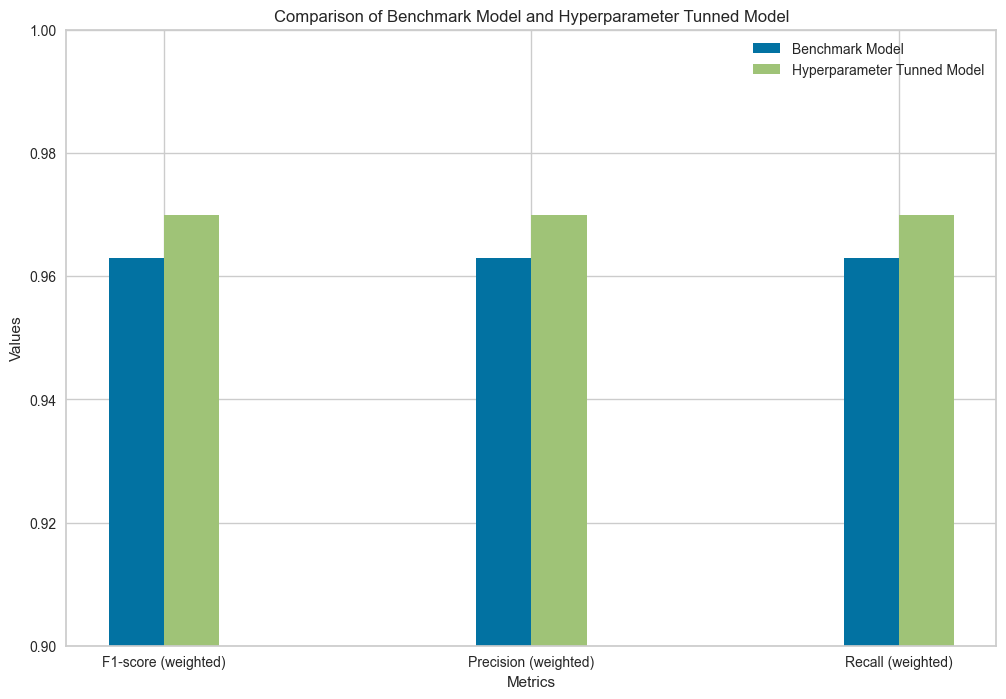

In [151]:
data1 = df_score_II.values
data2 = df_score_III.values

# Define the labels for the metrics
labels = ['F1-score (weighted)', 'Precision (weighted)', 'Recall (weighted)']

# Create a bar plot with two bars side by side
x = range(len(labels))
width = 0.15  # Width of each bar

plt.figure(figsize=(12,8))
plt.bar(x, data1, width, label='Benchmark Model')
plt.bar([i + width for i in x], data2, width, label='Hyperparameter Tunned Model')

# Add labels and title (optional)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0.90,1)
plt.title('Comparison of Benchmark Model and Hyperparameter Tunned Model')
plt.xticks([i + width/2 for i in x], labels)  # Set x-axis labels

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Comment**<br>

Considering the F1-score, which balances Precision and Recall, the Hyperparameter Tuned Model exhibits a modest enhancement relative to the Benchmark Model. The advancement in the scoring with the Hyperparameter Tuned Model could be attributed to optimal parameters being passed in as estimators. Hence the hyperparameter tuned model can be considered as the final benchmark model.

In [150]:
# Extract the dependent and independent variables...
X = scaled_df_cc_general.drop(columns=["clusters"], axis=1)
y = scaled_df_cc_general["clusters"]

# Initialize the random forest classifier...
final_model_rf_classifier = RandomForestClassifier(random_state=42, bootstrap=False, criterion="gini", max_depth=20, n_estimators=120)
final_model_rf_classifier = final_model_rf_classifier.fit(X,y)

with open("./saved_models/final_benchmark_model.pkl", "wb") as file:
    pickle.dump(final_model_rf_classifier, file)

In [152]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

8) Model deployment: [20 Pts] <br>
Use the Flask web framework to deploy the final benchmark model and use it to identify the segment that a new customer belongs to. Implement a web application that receives  input  and  displays  the  result,  i.e.,  the  customer’s  segment for the newly  input data. Ensure that the input is scaled appropriately if the dataset was scaled in 3b). (Hint: You can read a serialized object using pickle)

In [127]:
# Flask libraries
from flask import Flask, render_template, request, flash
import joblib
import os

In [153]:
app=Flask(__name__) #creates the app to process the user input
#Configure the app
app.logger.setLevel('INFO')
app.secret_key = "amakuru"

app.template_folder = os.path.abspath('templates')
app.static_folder = 'static'

# Load the StandardScaler object
with open('./saved_models/st_scaled_data.pkl', 'rb') as scaler_file:
    scaler = joblib.load(scaler_file)


#Define the functions that represent the actions that occur as the user interacts with the app.
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method =='POST':
        
        try:
            #Retrieve the form inputs
            balance=float(request.form['balance'])
            balance_frequency=float(request.form['balance_frequency'])
            purchases=float(request.form['purchases'])
            oneoff_purchases=float(request.form['oneoff_purchases'])
            installments_purchases=float(request.form['installments_purchases'])
            cash_advance=float(request.form['cash_advance'])
            purchases_frequency =float(request.form['purchases_frequency'])
            oneoff_purchases_frequency=float(request.form['oneoff_purchases_frequency'])
            purchases_installments_frequency=float(request.form['purchases_installments_frequency'])
            cash_advance_frequency=float(request.form['cash_advance_frequency'])
            cash_advance_trx=float(request.form['cash_advance_trx'])
            purchases_trx=float(request.form['purchases_trx'])
            credit_limit =float(request.form['credit_limit'])
            payments=float(request.form['payments'])
            minimum_payments=float(request.form['minimum_payments'])
            prc_full_payment=float(request.form['prc_full_payment'])

            #Consolidate the inputs
            input_args=[

            balance,
            balance_frequency,
            purchases,
            oneoff_purchases,
            installments_purchases,
            cash_advance,
            purchases_frequency,
            oneoff_purchases_frequency,
            purchases_installments_frequency,
            cash_advance_frequency,
            cash_advance_trx,
            purchases_trx,
            credit_limit,
            payments,
            minimum_payments,
            prc_full_payment                   
            ]

            input_arr=np.array(input_args)

            inputs=input_arr.reshape(1,-1)# 1 row, numpy with suggest the number of columns

            #load the saved model
            model = pickle.load(open('saved_models/final_benchmark_model.pkl','rb'))
    
            result  = model.predict(inputs)

            #Transform result to human readable
            if result[0]== 2:
                predictions ='Cluster 0'
                color_signal='blue'
            elif result[0] == 1:
                predictions ='Cluster 1'
                color_signal='yellow'
            else:
                predictions ='Cluster 2'
                color_signal='red'
                
            #Populate flashed messages
            flash(predictions)
            flash(color_signal)

        except ValueError:
            return "Error: Values not valid."
    return render_template('predict.html',prediction=predictions, color_signal=color_signal)


In [154]:
if __name__=='__main__':
    app.run(host='localhost', port=1887, debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:1887
Press CTRL+C to quit
127.0.0.1 - - [17/Dec/2023 08:49:04] "GET / HTTP/1.1" 200 -
C:\Users\Damilare\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [17/Dec/2023 08:49:25] "POST /predict HTTP/1.1" 200 -
